Import pandas and sqlite3 for working with data sets and creating database.

In [50]:
import pandas as pd
import sqlite3 as sql3 

Open the titanic dataset with pandas

In [11]:
df = pd.read_csv(r"C:\Users\faiya\Downloads\titanic-main\titanic-main\Data Preprocessing\train.csv")

Load the dataset

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check the columns in dataset

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Check for data types and Null values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Cleaning and wranling the dataset

Age, Embarked and Cabin values are missing

**Age cleaning** 

- Fill Null Values in the age column by grouping Sex And Pclass and getting Median values for each group.

In [15]:
# Check how many NaN values exist
missing_age = df['Age'].isnull().sum()
print(f"Total counts of missing values: {missing_age}")
percent_missing = (missing_age / len(df['Age']) ) * 100
print(f"The percentage of missing values {percent_missing:.2f}%")

Total counts of missing values: 177
The percentage of missing values 19.87%


- Since the percentage of missing values is pretty high, so the best practice for filling the missing values is to find the median value by grouping other columns.

In [16]:
age_by_sex_pclass = df.groupby(['Sex','Pclass'])['Age'].median()
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [17]:
df['Age'] = df['Age'].fillna(df.groupby(['Sex','Pclass'])['Age'].transform('median'))

Checking for Null values again

In [18]:
df['Age'].isnull().sum()

np.int64(0)

**Cabin column cleaning**

Since cabin values are unique and cannot be figured out, so the values will be filled with Unknown

In [19]:
missing_cabin = df['Cabin'].isna().sum()
print(f"Missing Values in Cabin column: {missing_cabin}")

Missing Values in Cabin column: 687


In [20]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

**Embarked column cleaning**

For categorical data, the most frequent category (mode) is used to fill missing values.

In [21]:
missing_port = df['Embarked'].isna().sum()
print(f"Missing Values in Cabin column: {missing_port}")

Missing Values in Cabin column: 2


In [22]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [23]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

Change Ports name for later display

In [24]:
df['Embarked'] = df['Embarked'].replace('C','Cherbourg')

df['Embarked'] = df['Embarked'].replace('Q','Queenstown')

df['Embarked'] = df['Embarked'].replace('S','Southampthon')

After cleaning, the data is ready to export.

In [25]:
df.to_csv('titanic_cleaned.csv', index=False)

Text(0.5, 1.0, 'Age Distribution of Titanic Passengers')

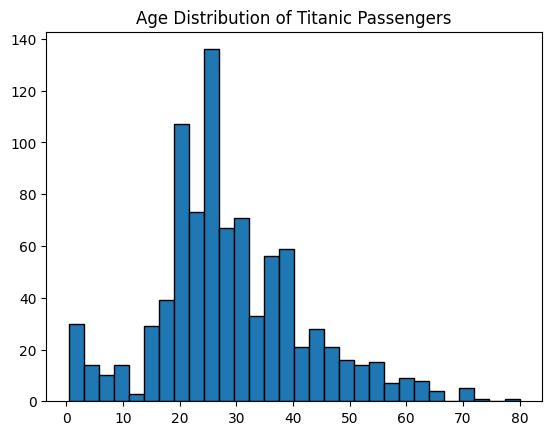

In [26]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution of Titanic Passengers')